In [2]:
# conventional way to import pandas
import pandas as pd

### How do I read a tabular data file into pandas?

In [3]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')

In [4]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Documentation for [**`read_table`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

In [6]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [5]:
# examine the first 5 rows
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### How do I select a pandas Series from a DataFrame?

In [6]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_table('http://bit.ly/uforeports', sep=',')

In [7]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('http://bit.ly/uforeports')

In [9]:
# examine the first 5 rows
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [10]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

**Bracket notation** will always work, whereas **dot notation** has limitations:

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

In [11]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


### Why do some pandas commands end with parentheses (and others don't)?

In [5]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')

**Methods** end with parentheses, while **attributes** don't:

In [12]:

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [13]:

movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [14]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [13]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [14]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Les Miserables,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### How do I rename columns in a pandas DataFrame?

In [16]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')

In [17]:
# examine the column names
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [18]:
# rename two of the columns by using the 'rename' method
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

Documentation for [**`rename`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [20]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [21]:
# replace the column names during the file reading process by using the 'names' parameter
ufo = pd.read_csv('http://bit.ly/uforeports', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [19]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns
ufo.head(3)

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Documentation for [**`str.replace`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html)

### How do I remove columns from a pandas DataFrame?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

In [ ]:
# remove a single column (axis=1 refers to columns)
ufo.drop('Colors Reported', axis=1,inplace=True)
ufo.head(3)
#ufo

Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [25]:
# remove multiple columns at once
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [26]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([0, 1], axis=0, inplace=True)
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


### How do I sort a pandas DataFrame or a Series?

In [25]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [28]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head(10)

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
910                     2046
596                 21 Grams
624                25th Hour
708         28 Days Later...
60                  3 Idiots
Name: title, dtype: object

In [29]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [30]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [31]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [32]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


[Summary of changes to the sorting API](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#changes-to-sorting-api) in pandas 0.17

### How do I filter rows of a pandas DataFrame by column value?

In [33]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [34]:
# examine the number of rows and columns
movies.shape

(979, 6)

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [35]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [36]:
# confirm that the list has the same length as the DataFrame
len(booleans)

979

In [37]:
# examine the first five list elements
booleans[0:5]

[False, False, True, False, False]

In [38]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [39]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [40]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [41]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [42]:
movies[movies.duration >= 200]['genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

### How do I apply multiple filter criteria to a pandas DataFrame?

In [43]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

In [45]:
# demonstration of the 'and' operator
print(True and True)

print(True and False)
print(False and False)

True
False
False


In [46]:
# demonstration of the 'or' operator
print(True or True)
print(True or False)
print(False or False)

True
True
False


Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [47]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [48]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [49]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

### When reading from a file, how do I read in only a subset of the columns?

In [50]:
# read a dataset of UFO reports into a DataFrame, and check the columns
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [51]:
# specify which columns to include by name
ufo = pd.read_csv('http://bit.ly/uforeports', usecols=['City', 'State'])

# or equivalently, specify columns by position
ufo = pd.read_csv('http://bit.ly/uforeports', usecols=[0, 4])
ufo.columns
ufo.head()

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00
3,Abilene,6/1/1931 13:00
4,New York Worlds Fair,4/18/1933 19:00


**Question:** When reading from a file, how do I read in only a subset of the rows?

In [52]:
# specify how many rows to read
ufo = pd.read_csv('http://bit.ly/uforeports', nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

**Question:** How do I iterate through a Series?

In [53]:
# Series are directly iterable (like a list)
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [54]:
ufo.iterrows()

<generator object DataFrame.iterrows at 0x00000190D0AB3CA8>

**Question:** How do I iterate through a DataFrame?

In [55]:
# various methods are available to iterate through a DataFrame
for index, row in ufo.iterrows():
    print(index,row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


In [56]:
#list(ufo.iterrows())

Documentation for [**`iterrows`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)

**Question:** How do I drop all non-numeric columns from a DataFrame?

In [57]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [58]:
import numpy as np
drinks.select_dtypes(include=[np.number])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
5,102,128,45,4.9
6,193,25,221,8.3
7,21,179,11,3.8
8,261,72,212,10.4
9,279,75,191,9.7


In [59]:
# only include numeric columns in the DataFrame
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)

**Question:** How do I know whether I should pass an argument as a string or a list?

In [ ]:
# describe all of the numeric columns
drinks.describe()

In [ ]:
# pass the string 'all' to describe all columns
drinks.describe(include='all')

In [ ]:
# pass a list of data types to only describe certain types
drinks.describe(include=['object', 'float64'])

In [ ]:
# pass a list even if you only want to describe a single data type
drinks.describe(include=['object'])

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### How do I use the "axis" parameter in pandas?

In [1]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

NameError: name 'pd' is not defined

In [7]:
# drop a column (temporarily)
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [8]:
# drop a row (temporarily)
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


When **referring to rows or columns** with the axis parameter:

- **axis 0** refers to rows
- **axis 1** refers to columns

In [ ]:
# calculate the mean of each numeric column
drinks.mean()

# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [ ]:
# calculate the mean of each row
drinks.mean(axis=1).head()

When performing a **mathematical operation** with the axis parameter:

- **axis 0** means the operation should "move down" the row axis
- **axis 1** means the operation should "move across" the column axis

In [ ]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

In [ ]:
# 'columns' is an alias for axis 1
drinks.mean(axis='columns').head()

## How do I use string methods in pandas?

In [ ]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

In [5]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [6]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [ ]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head(10)

In [ ]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

In [ ]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

In [ ]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

In [ ]:
hash("a")

In [ ]:
hash([2,3,4])

In [ ]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference

### How do I change the data type of a pandas Series?

In [2]:
import pandas as pd
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
# examine the data type of each Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [4]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
drinks.dtypes

Documentation for [**`astype`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)

In [5]:
# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [6]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [8]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [9]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [10]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

### When should I use a "groupby" in pandas?

In [10]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [12]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [13]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [14]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [15]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [16]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [17]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [19]:
# allow plots to appear in the notebook
%matplotlib inline

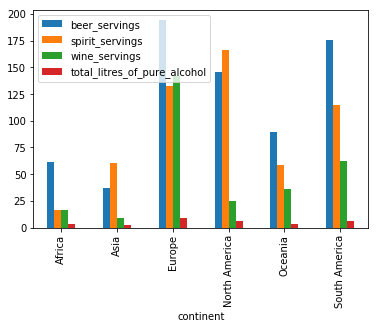

In [20]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

### How do I explore a pandas Series?

In [1]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

NameError: name 'pd' is not defined

In [22]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**Exploring a non-numeric Series:**

In [23]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [24]:
df = pd.DataFrame([(1, 'Germany,France'),
                   (2, 'France'),
                   (3, 'Indonesia'),
                   (4, 'France'),
                   (5, 'France'),
                   (6, 'Germany'),
                   (7, 'UK'),
                   ],
                  columns=['groupid', 'country'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df

,groupid,country
a,1,"Germany,France"
b,2,France
c,3,Indonesia
d,4,France
e,5,France
f,6,Germany
g,7,UK


In [26]:
df.country.value_counts()

France            3
Indonesia         1
UK                1
Germany           1
Germany,France    1
Name: country, dtype: int64

In [27]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [28]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [29]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [30]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [31]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [32]:
# count the number of unique values in the Series
movies.genre.nunique()

16

In [33]:
movies.genre.head()

0     Crime
1     Crime
2     Crime
3    Action
4     Crime
Name: genre, dtype: object

In [34]:
movies.content_rating.head()

0        R
1        R
2        R
3    PG-13
4        R
Name: content_rating, dtype: object

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [35]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

**Exploring a numeric Series:**

In [38]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [39]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
102    20
101    20
129    19
Name: duration, dtype: int64

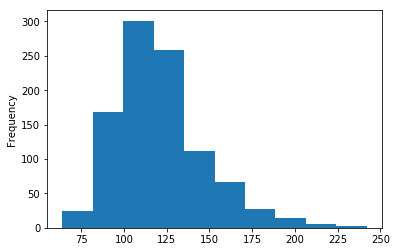

In [40]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

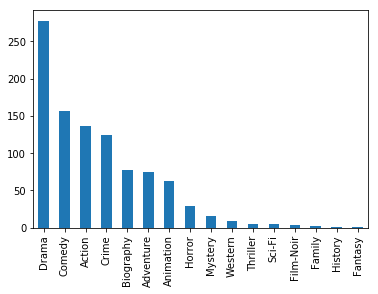

In [41]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

### How do I handle missing values in pandas?

In [35]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [36]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [37]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [38]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [46]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [50]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [39]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [40]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [41]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [42]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [54]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [56]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [43]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
HEXAGON         1
FLARE           1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [44]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [45]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

### What do I need to know about the pandas index? (Part 1)

In [46]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [47]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [65]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [66]:
# neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [67]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**What is the index used for?**

1. identification
2. selection
3. alignment (covered in the next video)

In [68]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [69]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [70]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [71]:
drinks.iloc[23]

beer_servings                             245
spirit_servings                           145
wine_servings                              16
total_litres_of_pure_alcohol              7.2
continent                       South America
Name: Brazil, dtype: object

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [72]:
# 'country' is now the index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [73]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [74]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [75]:
# index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [76]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Documentation for [**`reset_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [77]:
# many DataFrame methods output a DataFrame
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [78]:
# you can interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

20.0

[Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

### What do I need to know about the pandas index? (Part 2)

In [48]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [80]:
# another example of a Series (output from the 'value_counts' method)
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [81]:
# set 'country' as the index
drinks.set_index('country', inplace=True)

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [49]:
# access the Series index
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [83]:
# access the Series values
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [84]:
# elements in a Series can be selected by index (using bracket notation)
drinks.continent.value_counts()['Africa']

53

In [85]:
# any Series can be sorted by its values
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [86]:
# any Series can also be sorted by its index
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) and [**`sort_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html)

**What is the index used for?**

1. identification (covered in the previous video)
2. selection (covered in the previous video)
3. alignment

In [87]:
# 'beer_servings' Series contains the average annual beer servings per person
drinks.beer_servings.head()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

- The two Series were **aligned** by their indexes.
- If a value is missing in either Series, the result is marked as **NaN**.
- Alignment enables us to easily work with **incomplete data**.

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

[Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

### How do I select multiple rows and columns from a pandas DataFrame?

In [8]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


The [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method is used to select rows and columns by **label**. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [9]:
# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [90]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [91]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [92]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [93]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [94]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [95]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [96]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [52]:
ufo.head(1)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00


In [97]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [98]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [54]:
#ufo.City=='Oakland'

In [99]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

The [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) method is used to select rows and columns by **integer position**. You can pass it:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [100]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [101]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [102]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [103]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


The [**`ix`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html) method is used to select rows and columns by **label or integer position**, and should only be used when you need to mix label-based and integer-based selection in the same call.

In [104]:
# read a dataset of alcohol consumption into a DataFrame and set 'country' as the index
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [105]:
# row with label 'Albania', column in position 0
drinks.ix['Albania', 0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


89

In [106]:
# row in position 1, column with label 'beer_servings'
drinks.ix[1, 'beer_servings']

89

**Rules for using numbers with `ix`:**

- If the index is **strings**, numbers are treated as **integer positions**, and thus slices are **exclusive** on the right.
- If the index is **integers**, numbers are treated as **labels**, and thus slices are **inclusive**.

In [107]:
# rows 'Albania' through 'Andorra' (inclusive), columns in positions 0 through 2 (exclusive)
drinks.ix['Albania':'Andorra', 0:2]

,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


In [108]:
# rows 0 through 2 (inclusive), columns in positions 0 through 2 (exclusive)
ufo.ix[0:2, 0:2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,City,Colors Reported
0,Ithaca,NaN
1,Willingboro,NaN
2,Holyoke,NaN


### When should I use the "inplace" parameter in pandas?

In [55]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [56]:
a,b=ufo.shape

In [111]:
# remove the 'City' column (doesn't affect the DataFrame since inplace=False)
ufo.drop('City', axis=1).head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [112]:
# confirm that the 'City' column was not actually removed
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [113]:
# remove the 'City' column (does affect the DataFrame since inplace=True)
ufo.drop('City', axis=1, inplace=True)

In [114]:
# confirm that the 'City' column was actually removed
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [115]:
# drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

(2490, 4)

In [116]:
# confirm that no rows were actually removed
ufo.shape

(18241, 4)

In [117]:
# use an assignment statement instead of the 'inplace' parameter
ufo = ufo.set_index('Time')
ufo.tail(20)

,Colors Reported,Shape Reported,State
Time,,,
12/29/2000 20:50,NaN,DISK,NH
12/29/2000 21:00,NaN,OTHER,PA
12/29/2000 22:00,NaN,NaN,SC
12/29/2000 23:30,NaN,DISK,OK
12/30/2000 10:00,NaN,FORMATION,CA
12/30/2000 22:00,NaN,FORMATION,CA
12/30/2000 22:00,NaN,TRIANGLE,CA
12/31/2000 4:00,NaN,LIGHT,TX
12/31/2000 11:45,NaN,DISK,IL


In [118]:
ufo.tail(15)

,Colors Reported,Shape Reported,State
Time,,,
12/30/2000 22:00,NaN,FORMATION,CA
12/30/2000 22:00,NaN,TRIANGLE,CA
12/31/2000 4:00,NaN,LIGHT,TX
12/31/2000 11:45,NaN,DISK,IL
12/31/2000 20:00,NaN,OVAL,CA
12/31/2000 20:00,NaN,OVAL,CA
12/31/2000 20:30,NaN,NaN,WI
12/31/2000 21:00,RED,VARIOUS,AK
12/31/2000 22:00,NaN,TRIANGLE,CA


In [119]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail(20)

,Colors Reported,Shape Reported,State
Time,,,
12/29/2000 20:50,RED,DISK,NH
12/29/2000 21:00,RED,OTHER,PA
12/29/2000 22:00,RED,DISK,SC
12/29/2000 23:30,RED,DISK,OK
12/30/2000 10:00,RED,FORMATION,CA
12/30/2000 22:00,RED,FORMATION,CA
12/30/2000 22:00,RED,TRIANGLE,CA
12/31/2000 4:00,RED,LIGHT,TX
12/31/2000 11:45,RED,DISK,IL


In [120]:
# compare with "forward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='ffill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,DISK,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,RED,OVAL,FL


### How do I make my pandas DataFrame smaller and faster?

In [1]:
import pandas as pd
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
# exact memory usage is unknown because object columns are references elsewhere
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


Documentation for [**`info`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) and [**`memory_usage`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.memory_usage.html)

In [2]:
# use the 'category' data type (new in pandas 0.15) to store the 'continent' strings as integers
drinks['continent']=drinks.continent.astype('category')
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [124]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [125]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [126]:
# repeat this process for the 'country' Series
drinks['country'] = drinks.country.astype('category')
drinks.memory_usage(deep=True)

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [127]:
# memory usage increased because we created 193 categories
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

The **category** data type should only be used with a string Series that has a **small number of possible values**.

[Overview of categorical data in pandas](http://pandas.pydata.org/pandas-docs/stable/categorical.html)

[API reference for categorical methods](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical)

Documentation for [**`to_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

Documentation for [**`to_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) and [**`read_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html)

#### how to read the pandas documentation?

[pandas API reference](http://pandas.pydata.org/pandas-docs/stable/api.html)

**Question:** What is the difference between **`ufo.isnull()`** and **`pd.isnull(ufo)`**?

In [128]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [129]:
# use 'isnull' as a top-level function
pd.isnull(ufo).head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [130]:
# equivalent: use 'isnull' as a DataFrame method
ufo.isnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

**Question:** Why are DataFrame slices inclusive when using **`.loc`**, but exclusive when using **`.iloc`**?

In [131]:
# label-based slicing is inclusive of the start and stop
ufo.loc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [132]:
# position-based slicing is inclusive of the start and exclusive of the stop
ufo.iloc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) and [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html)

In [133]:
# 'iloc' is simply following NumPy's slicing convention...
ufo.values[0:4, :]

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ['Abilene', nan, 'DISK', 'KS', '6/1/1931 13:00']], dtype=object)

In [134]:
# ...and NumPy is simply following Python's slicing convention
'python'[0:4]

'pyth'

In [135]:
# 'loc' is inclusive of the stopping label because you don't necessarily know what label will come after it
ufo.loc[0:4, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


**Question:** How do I randomly sample rows from a DataFrame?

In [62]:
# sample 3 rows from the DataFrame without replacement (new in pandas 0.16.1)
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
5552,Grass Valley,NaN,DISK,CA,11/10/1986 23:55
12481,Skippers,NaN,TRIANGLE,VA,11/1/1998 20:30
10015,Chandler,NaN,TRIANGLE,AZ,3/13/1997 20:30


Documentation for [**`sample`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

In [66]:
# use the 'random_state' parameter for reproducibility
ufo.sample(n=3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [67]:
# sample 75% of the DataFrame's rows without replacement
train = ufo.sample(frac=0.75, random_state=99)

In [68]:
train

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00
2094,Victorville,NaN,LIGHT,CA,6/6/1971 21:00
15905,Black Canyon City,BLUE,CIRCLE,AZ,2/16/2000 4:45
6792,Houston,NaN,CHEVRON,TX,6/10/1992 23:00
5063,Ely,NaN,DIAMOND,MN,6/15/1984 19:00
16626,Atlantic Ocean,NaN,NaN,NC,6/17/2000 0:35


In [139]:
# store the remaining 25% of the rows in another DataFrame
test = ufo.loc[~ufo.index.isin(train.index), :]

Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.isin.html)

### How do I create dummy variables in pandas?

In [69]:
# read the training dataset from Kaggle's Titanic competition
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

In [142]:
# alternative: use 'get_dummies' to create one column for every possible value
pd.get_dummies(train.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [71]:
# drop the first dummy variable ('female') using the 'iloc' method
pd.get_dummies(train.Sex).iloc[:, 1:].head()

,male
0,1
1,0
2,0
3,0
4,1


In [144]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [145]:
pd.get_dummies(train.Sex, prefix='Sex').head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [146]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [147]:
# drop the first dummy variable ('C')
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


How to translate these values back to the original 'Embarked' value:

- **0, 0** means **C**
- **1, 0** means **Q**
- **0, 1** means **S**

In [148]:
# save the DataFrame of dummy variables and concatenate them to the original DataFrame
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [149]:
# reset the DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [151]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


Documentation for [**`get_dummies`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

### How do I find and remove duplicate rows in pandas?

In [72]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [73]:
#users.shape
users.tail()
users[users.zip_code=='02215']

,age,gender,occupation,zip_code
user_id,,,,
76,20,M,student,02215
216,22,M,engineer,02215
940,32,M,administrator,02215


In [78]:
users[users["zip_code"]== '02215'].head()

,age,gender,occupation,zip_code
user_id,,,,
76,20,M,student,02215
216,22,M,engineer,02215
940,32,M,administrator,02215


In [154]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

user_id
939    False
940     True
941    False
942    False
943    False
Name: zip_code, dtype: bool

In [155]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [156]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [157]:
# count the duplicate rows
users.duplicated().sum()

7

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [81]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]
#users[users.zip_code=='55414']

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [159]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [160]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [161]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

(936, 4)

In [162]:
users.drop_duplicates(keep='last').tail()

,age,gender,occupation,zip_code
user_id,,,,
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209
943,22,M,student,77841


In [163]:
users.drop_duplicates(keep=False).shape

(929, 4)

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [164]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [165]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

### How do I create a pandas DataFrame from another object?

In [82]:
# create a DataFrame from a dictionary (keys become column names, values become data)
pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']})

,color,id
0,red,100
1,blue,101
2,red,102


In [83]:
# optionally specify the order of columns and define the index
df = pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']}, columns=['id', 'color'], index=['a', 'b', 'c'])
df

,id,color
a,100,red
b,101,blue
c,102,red


Documentation for [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [84]:
# create a DataFrame from a list of lists (each inner list becomes a row)
pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color'])

,id,color
0,100,red
1,101,blue
2,102,red


In [85]:
# create a NumPy array (with shape 4 by 2) and fill it with random numbers between 0 and 1
import numpy as np
arr = np.random.rand(4, 2)
arr

array([[0.37325777, 0.00578648],
       [0.59626661, 0.88711774],
       [0.10880083, 0.67195833],
       [0.42920393, 0.8559166 ]])

In [86]:
# create a DataFrame from the NumPy array
pd.DataFrame(arr, columns=['one', 'two'])

,one,two
0,0.373258,0.005786
1,0.596267,0.887118
2,0.108801,0.671958
3,0.429204,0.855917


In [171]:
# create a DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100)
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})

,student,test
0,100,77
1,101,93
2,102,71
3,103,73
4,104,79
5,105,96
6,106,61
7,107,88
8,108,65
9,109,99


Documentation for [**`np.arange`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [**`np.random`**](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [172]:
# 'set_index' can be chained with the DataFrame constructor to select an index
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)}).set_index('student')

,test
student,
100,92
101,97
102,60
103,92
104,85
105,60
106,73
107,67
108,93


Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [173]:
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
s

c     round
b    square
Name: shape, dtype: object

Documentation for [**`Series`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [174]:
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
pd.concat([df, s], axis=1)

,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


**Notes:**

- The Series name became the column name in the DataFrame.
- The Series data was aligned to the DataFrame by its index.
- The 'shape' for row 'a' was marked as a missing value (NaN) because that index was not present in the Series.

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

###  How do I apply a function to a pandas Series or DataFrame?

In [87]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [176]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [177]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [178]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [179]:
# we want to extract the last name of each person
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [180]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [89]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [90]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=1).head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [183]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [184]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [185]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [91]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [92]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [188]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [189]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [190]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
